# Import

In [1]:
%matplotlib inline
print("h")

In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.utils.model_zoo as model_zoo

import torchvision
import torchvision.transforms as transforms
from torchvision import datasets

from os import path

import matplotlib.pyplot as plt
import numpy as np
import torch.optim as optim

# GPU

In [3]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# Assume that we are on a CUDA machine, then this should print a CUDA device:

print(device)

cuda:0


# Data

In [4]:
data_dir = "/data/dataset-of-4"

# data_cat = ('train-before', 'train-after', 'test')
data_cat = ('train', 'train-after-10000', 'val')

In [5]:
input_shape = 224
batch_size = 64
scale = 360
use_parallel = True
use_gpu = True
epochs = 100
num_output = 4

data_transforms = transforms.Compose([
        transforms.Resize(scale),
        transforms.RandomResizedCrop(input_shape),
        transforms.ToTensor()])

In [6]:
image_datasets = {x: datasets.ImageFolder(path.join(data_dir, x), data_transforms) for x in data_cat}
dataloaders = {x: torch.utils.data.DataLoader(image_datasets[x], batch_size=batch_size,
                                         shuffle=True, num_workers=4) for x in data_cat}
dataset_sizes = {x: len(image_datasets[x]) for x in data_cat}

In [7]:
train_before, train_after, val = data_cat

trainloader, testloader = dataloaders[train_after], dataloaders[val]

In [8]:
print(image_datasets[train_before])
classes = image_datasets[train_before].classes
print(classes)

# print(image_datasets['train-before'].__getitem__(0))

Dataset ImageFolder
    Number of datapoints: 51
    Root Location: /data/dataset-of-4/train
    Transforms (if any): Compose(
                             Resize(size=360, interpolation=PIL.Image.BILINEAR)
                             RandomResizedCrop(size=(224, 224), scale=(0.08, 1.0), ratio=(0.75, 1.3333), interpolation=PIL.Image.BILINEAR)
                             ToTensor()
                         )
    Target Transforms (if any): None
['Hard-Edge-Painting', 'Impressionism', 'Ink-and-wash-painting', 'Neo-Expressionism']


<class 'torch.utils.data.dataloader._DataLoaderIter'>
torch.Size([64, 3, 224, 224])
tensor([2, 3, 1, 1, 3, 0, 3, 1, 3, 3, 0, 3, 0, 1, 1, 2, 1, 1, 0, 1, 0, 1, 0, 0,
        2, 1, 3, 0, 0, 0, 3, 3, 0, 3, 3, 0, 2, 3, 1, 1, 0, 3, 3, 2, 0, 1, 2, 3,
        0, 3, 1, 3, 3, 3, 0, 3, 1, 2, 1, 3, 1, 3, 2, 0])


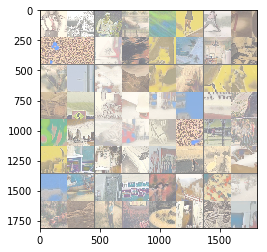

In [9]:
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))


# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

print(type(dataiter))

# show images
imshow(torchvision.utils.make_grid(images))
print(images.shape)
# print labels
print(labels)

# CNN

Copy the neural network from the Neural Networks section before and modify it to
take 3-channel images (instead of 1-channel images as it was defined).



In [10]:
# class Net(nn.Module):
#     def __init__(self):
#         super(Net, self).__init__()
#         self.conv1 = nn.Conv2d(3, 6, 5)
#         self.pool = nn.MaxPool2d(2, 2)
#         self.conv2 = nn.Conv2d(6, 16, 5)
#         self.fc1 = nn.Linear(16 * 5 * 5, 120)
#         self.fc2 = nn.Linear(120, 84)
#         self.fc3 = nn.Linear(84, num_output)

#     def forward(self, x):
#         x = self.pool(F.relu(self.conv1(x)))
#         x = self.pool(F.relu(self.conv2(x)))
#         x = x.view(-1, 16 * 5 * 5)
#         x = F.relu(self.fc1(x))
#         x = F.relu(self.fc2(x))
#         x = self.fc3(x)
#         return x


# net = Net()

# VGG

https://github.com/pytorch/vision/blob/master/torchvision/models/vgg.py

In [11]:
# __all__ = [
#     'VGG', 'vgg11', 'vgg11_bn', 'vgg13', 'vgg13_bn', 'vgg16', 'vgg16_bn',
#     'vgg19_bn', 'vgg19',
# ]


# model_urls = {
#     'vgg11': 'https://download.pytorch.org/models/vgg11-bbd30ac9.pth',
#     'vgg13': 'https://download.pytorch.org/models/vgg13-c768596a.pth',
#     'vgg16': 'https://download.pytorch.org/models/vgg16-397923af.pth',
#     'vgg19': 'https://download.pytorch.org/models/vgg19-dcbb9e9d.pth',
#     'vgg11_bn': 'https://download.pytorch.org/models/vgg11_bn-6002323d.pth',
#     'vgg13_bn': 'https://download.pytorch.org/models/vgg13_bn-abd245e5.pth',
#     'vgg16_bn': 'https://download.pytorch.org/models/vgg16_bn-6c64b313.pth',
#     'vgg19_bn': 'https://download.pytorch.org/models/vgg19_bn-c79401a0.pth',
# }


# class VGG(nn.Module):

#     def __init__(self, features, num_classes=2, init_weights=True):
#         super(VGG, self).__init__()
#         self.features = features
        
# #         self.classifier = nn.Sequential(
# #             nn.Linear(512 * 7 * 7, 4096),
# #             nn.ReLU(True),
# #             nn.Dropout(),
# #             nn.Linear(4096, 4096),
# #             nn.ReLU(True),
# #             nn.Dropout(),
# #             nn.Linear(4096, num_classes),
# #         )


#         self.classifier_style = nn.Sequential(
#             nn.Linear(512 * 7 * 7, 512),
#             nn.ReLU(True),
#             nn.Dropout(),
#             nn.Linear(512, 128),
#             nn.ReLU(True),
#             nn.Dropout(),
#             nn.Linear(128, num_classes),
#         )


#         if init_weights:
#             self._initialize_weights()

#     def forward(self, x):
#         x = self.features(x)
#         x = x.view(x.size(0), -1)
# #         x = self.classifier(x)
#         x = self.classifier_style(x)

#         return x

#     def _initialize_weights(self):
#         for m in self.modules():
#             if isinstance(m, nn.Conv2d):
#                 nn.init.kaiming_normal_(m.weight, mode='fan_out', nonlinearity='relu')
#                 if m.bias is not None:
#                     nn.init.constant_(m.bias, 0)
#             elif isinstance(m, nn.BatchNorm2d):
#                 nn.init.constant_(m.weight, 1)
#                 nn.init.constant_(m.bias, 0)
#             elif isinstance(m, nn.Linear):
#                 nn.init.normal_(m.weight, 0, 0.01)
#                 nn.init.constant_(m.bias, 0)


# def make_layers(cfg, batch_norm=False):
#     layers = []
#     in_channels = 3
#     for v in cfg:
#         if v == 'M':
#             layers += [nn.MaxPool2d(kernel_size=2, stride=2)]
#         else:
#             conv2d = nn.Conv2d(in_channels, v, kernel_size=3, padding=1)
#             if batch_norm:
#                 layers += [conv2d, nn.BatchNorm2d(v), nn.ReLU(inplace=True)]
#             else:
#                 layers += [conv2d, nn.ReLU(inplace=True)]
#             in_channels = v
#     return nn.Sequential(*layers)


# cfg = {
#     'A': [64, 'M', 128, 'M', 256, 256, 'M', 512, 512, 'M', 512, 512, 'M'],
#     'B': [64, 64, 'M', 128, 128, 'M', 256, 256, 'M', 512, 512, 'M', 512, 512, 'M'],
#     'D': [64, 64, 'M', 128, 128, 'M', 256, 256, 256, 'M', 512, 512, 512, 'M', 512, 512, 512, 'M'],
#     'E': [64, 64, 'M', 128, 128, 'M', 256, 256, 256, 256, 'M', 512, 512, 512, 512, 'M', 512, 512, 512, 512, 'M'],
# }

# def load_pretrain(model, weights_dict):
    
#     model_dict = model.state_dict()
#     loaded_dict = {k:v for k, v in weights_dict.items() if k in model_dict.keys()}
#     model_dict.update(loaded_dict)
    
#     model.load_state_dict(model_dict)
#     print("Pretrained weights loaded")
#     print("Loaded layers:{}".format([l for l in loaded_dict.keys()]))
    

# def vgg11(pretrained=False, **kwargs):
#     """VGG 11-layer model (configuration "A")
#     Args:
#         pretrained (bool): If True, returns a model pre-trained on ImageNet
#     """
#     if pretrained:
#         kwargs['init_weights'] = False
#     model = VGG(make_layers(cfg['A']), **kwargs)
#     if pretrained:
#         model.load_state_dict(model_zoo.load_url(model_urls['vgg11']))
#     return model


# def vgg11_bn(pretrained=False, **kwargs):
#     """VGG 11-layer model (configuration "A") with batch normalization
#     Args:
#         pretrained (bool): If True, returns a model pre-trained on ImageNet
#     """
#     if pretrained:
#         kwargs['init_weights'] = False
#     model = VGG(make_layers(cfg['A'], batch_norm=True), **kwargs)
#     if pretrained:
#         model.load_state_dict(model_zoo.load_url(model_urls['vgg11_bn']))
#     return model


# def vgg13(pretrained=False, **kwargs):
#     """VGG 13-layer model (configuration "B")
#     Args:
#         pretrained (bool): If True, returns a model pre-trained on ImageNet
#     """
#     if pretrained:
#         kwargs['init_weights'] = False
#     model = VGG(make_layers(cfg['B']), **kwargs)
#     if pretrained:
#         model.load_state_dict(model_zoo.load_url(model_urls['vgg13']))
#     return model


# def vgg13_bn(pretrained=False, **kwargs):
#     """VGG 13-layer model (configuration "B") with batch normalization
#     Args:
#         pretrained (bool): If True, returns a model pre-trained on ImageNet
#     """
#     if pretrained:
#         kwargs['init_weights'] = False
#     model = VGG(make_layers(cfg['B'], batch_norm=True), **kwargs)
#     if pretrained:
#         model.load_state_dict(model_zoo.load_url(model_urls['vgg13_bn']))
#     return model


# def vgg16(pretrained=False, **kwargs):
#     """VGG 16-layer model (configuration "D")
#     Args:
#         pretrained (bool): If True, returns a model pre-trained on ImageNet
#     """
#     if pretrained:
#         kwargs['init_weights'] = False
#     model = VGG(make_layers(cfg['D']), **kwargs)
#     if pretrained:
#         load_pretrain(model, model_zoo.load_url(model_urls['vgg16']))
# #         model.load_state_dict(model_zoo.load_url(model_urls['vgg16']))
#     return model


# def vgg16_bn(pretrained=False, **kwargs):
#     """VGG 16-layer model (configuration "D") with batch normalization
#     Args:
#         pretrained (bool): If True, returns a model pre-trained on ImageNet
#     """
#     if pretrained:
#         kwargs['init_weights'] = False
#     model = VGG(make_layers(cfg['D'], batch_norm=True), **kwargs)
#     if pretrained:
#         model.load_state_dict(model_zoo.load_url(model_urls['vgg16_bn']))
#     return model


# def vgg19(pretrained=False, **kwargs):
#     """VGG 19-layer model (configuration "E")
#     Args:
#         pretrained (bool): If True, returns a model pre-trained on ImageNet
#     """
#     if pretrained:
#         kwargs['init_weights'] = False
#     model = VGG(make_layers(cfg['E']), **kwargs)
#     if pretrained:
#         model.load_state_dict(model_zoo.load_url(model_urls['vgg19']))
#     return model


# def vgg19_bn(pretrained=False, **kwargs):
#     """VGG 19-layer model (configuration 'E') with batch normalization
#     Args:
#         pretrained (bool): If True, returns a model pre-trained on ImageNet
#     """
#     if pretrained:
#         kwargs['init_weights'] = False
#     model = VGG(make_layers(cfg['E'], batch_norm=True), **kwargs)
#     if pretrained:
#         model.load_state_dict(model_zoo.load_url(model_urls['vgg19_bn']))
#     return model

In [12]:
# net = vgg16(pretrained=True, num_classes=num_output)

In [13]:
net = torchvision.models.alexnet(pretrained=False, num_classes=num_output)

In [14]:
# net.to("cuda")

# Train

In [15]:
def train_one_epo(model, dataloader, criterion, optimizer, log_step, device="cuda"):

    logs = {"train_loss":[], "train_accu":[]}

    running_loss = 0.0
    correct = 0.0
    total = 0.0
    for i, data in enumerate(dataloader, 0):
        # get the inputs
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

        # print statistics
        running_loss += loss.item()
        if i % log_step == log_step-1:    
            print('loss for [%d, %d] batch: %.3f' %
                  (i+1-log_step, i + 1, running_loss / log_step))
            logs["train_loss"].append(running_loss / log_step)
            running_loss = 0.0

#         print(correct, total)
    print('Accuracy of the network on the {} training images: %d %%'.format(total) % (
        100 * correct / total))
    logs["train_accu"] = 100 * correct / total
    
    return logs
    

In [16]:
def test(model, dataloader, num_classes, batch = 256, device = "cuda"):
    
    model.to(device)
    
    logs = {"test_accu":[]}
    
    correct = 0
    total = 0
    
    class_correct = list(0. for i in range(num_classes))
    class_total = list(0. for i in range(num_classes))
    
    with torch.no_grad():
        for data in dataloader:
            images, labels = data
            images, labels = images.to(device), labels.to(device)
            
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
            
            c = (predicted == labels).squeeze()
            
            for i in range(batch):           
                if i >= len(labels):
                    break
                
                label = labels[i]
                class_correct[label] += c[i].item()
                class_total[label] += 1
    
#     print(correct, total)
    print('Accuracy of the network on the {} test images: %d %%'.format(total) % (
        100 * correct / total))
    logs["test_accu"].append(100 * correct / total)
    
    
    for i in range(num_classes):
        print('Accuracy of %5s : %2d %%' % (
            classes[i], 100 * class_correct[i] / class_total[i]))
        
    return logs

In [17]:
def train(model, trainloader, testloader, batch_size, num_epoch, criterion, optimizer, log_step, num_classes, device="cuda"):
    
    model.to(device)
    
    logs = {"trn_metrics":{"train_loss":[], "train_accu":[]}, "tst_metrics":{"test_accu":[]}, 
            "meta":{"log_step":log_step, "train_bsize":batch_size}}

    
    for epoch in range(num_epoch): 
        
        print("****************** Begin training epoch: {} ********************".format(epoch+1))
        
        train_logs = train_one_epo(model, trainloader, criterion, optimizer, log_step, device=device)
        test_logs = test(model, testloader, num_classes, device = device)
        
        for k, v in train_logs.items():
            logs["trn_metrics"][k].append(v)

        for k, v in test_logs.items():
            logs["tst_metrics"][k].append(v)

    print('Finished Training')
    return logs

In [18]:
# def train(model, dataloader, num_epoch, criterion, optimizer, log_step, device="cuda"):
    
#     model.to(device)
        
#     for epoch in range(num_epoch):  # loop over the dataset multiple times
#         running_loss = 0.0
#         correct = 0.0
#         total = 0.0
#         for i, data in enumerate(dataloader, 0):
#             # get the inputs
#             inputs, labels = data
#             inputs, labels = inputs.to(device), labels.to(device)

#             # zero the parameter gradients
#             optimizer.zero_grad()

#             # forward + backward + optimize
#             outputs = model(inputs)
#             loss = criterion(outputs, labels)
#             loss.backward()
#             optimizer.step()
            
#             _, predicted = torch.max(outputs.data, 1)
#             total += labels.size(0)
#             correct += (predicted == labels).sum().item()

#             # print statistics
#             running_loss += loss.item()
#             if i % log_step == log_step-1:    
#                 print('[%d, %5d] loss: %.3f' %
#                       (epoch + 1, i + 1, running_loss / log_step))
#                 running_loss = 0.0
                
#         print(correct, total)
#         print('Accuracy of the network on the {} images: %d %% at {} epoch'.format(total, epoch) % (
#             100 * correct / total))

#     print('Finished Training')

## training hyperparameters

In [19]:
epoch = 200

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters())

In [ ]:
logs = train(net, trainloader, testloader, batch_size, epoch, criterion, optimizer, num_classes = 4, log_step=20, device=device)

****************** Begin training epoch: 1 ********************
loss for [0, 20] batch: 1.439
loss for [20, 40] batch: 1.384
loss for [40, 60] batch: 1.377
loss for [60, 80] batch: 1.384
loss for [80, 100] batch: 1.387
loss for [100, 120] batch: 1.384
loss for [120, 140] batch: 1.386
loss for [140, 160] batch: 1.381
loss for [160, 180] batch: 1.388
loss for [180, 200] batch: 1.389
loss for [200, 220] batch: 1.382
loss for [220, 240] batch: 1.381
loss for [240, 260] batch: 1.386
loss for [260, 280] batch: 1.385
loss for [280, 300] batch: 1.429
Accuracy of the network on the 19580.0 training images: 26 %
Accuracy of the network on the 949 test images: 24 %
Accuracy of Hard-Edge-Painting :  0 %
Accuracy of Impressionism :  0 %
Accuracy of Ink-and-wash-painting : 100 %
Accuracy of Neo-Expressionism :  0 %
****************** Begin training epoch: 2 ********************
loss for [0, 20] batch: 1.386
loss for [20, 40] batch: 1.384
loss for [40, 60] batch: 1.384
loss for [60, 80] batch: 1.387


In [ ]:
print(logs)

In [ ]:
plt.plot([trn_loss for l in logs["trn_metrics"]["train_loss"] for trn_loss in l])

# Test

In [ ]:
# # print(len(testloader.data))
# # print(testloader)
# test(net, testloader, len(classes), batch_size)

In [ ]:
# test(net, trainloader, len(classes), batch_size)